In [2]:
import pandas as pd
import numpy as np
# import random
import scipy as sp
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.svm  import SVR
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer,r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras 
import kerastuner as kt
import tensorflow as tf
from tensorflow import keras as ks





To evaluate our model, we use R2 score.

In [11]:
def score_model(X_test, Y_test, Y_pred):
    u = np.sum((Y_test - Y_pred)**2)
    v = np.sum((Y_test - np.mean(Y_test, axis=0))**2)

    return 1 - u/v


We upload data here and process it. Then we split train and test data and print some of them to check if everything works correctly.

In [12]:
noise_std = 0.1

# df = pd.read_csv('Tomography - noise_' + str(noise_std) + ' - No of removed measurements_0.csv')
df=pd.read_csv('lol.csv')

df = df.drop('Unnamed: 0', axis=1)

# df = df.sample(n=10000)
# df = df.sample(n=20000)

print(df)

# X = df[["feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8", "feature9", "feature10", "feature11", "feature12", "feature13", "feature14", "feature15", "feature16"]].multiply(1/df['feature1'], axis="index").to_numpy()

X = df[["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8", "feature9", "feature10", "feature11", "feature12", "feature13", "feature14", "feature15", "feature16"]].to_numpy()


Y = df[["label1", "label2", "label3", "label4", "label5", "label6", "label7", "label8", "label9", "label10", "label11", "label12", "label13", "label14", "label15", "label16"]].to_numpy()

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


free_params = 16

# print(X[0])

        feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0       0.360210  0.185256  0.460048  0.080421  0.253336 -0.007983  0.152587   
1       0.183160  0.049485  0.134026  0.412545  0.364338  0.155872  0.294169   
2       0.317019  0.374407  0.210512  0.515394  0.156974  0.203059  0.127567   
3       0.275401  0.391152  0.116177  0.342888  0.206863  0.337896  0.274198   
4       0.404453  0.563349  0.220006  0.456629  0.341826  0.115529 -0.018777   
...          ...       ...       ...       ...       ...       ...       ...   
199996  0.289187  0.340885  0.377682  0.314358  0.276559  0.163274  0.362909   
199997  0.281361  0.160791  0.455558  0.434837  0.085047  0.371651  0.160672   
199998  0.038134  0.253515  0.242320  0.244411  0.093843  0.017178  0.079723   
199999  0.224696  0.176235  0.105115  0.178771  0.194244  0.290372  0.384730   
200000  0.221576  0.386561  0.175625  0.343328  0.156447  0.251569  0.152887   

        feature8  feature9  feature10  

In [13]:
print(X_test.shape, Y_test.shape, X_train.shape, Y_train.shape)

(40001, 16) (40001, 16) (160000, 16) (160000, 16)


In [14]:
np.mean(X_train, axis=0).shape

(16,)

First, we construct a neural network with a random structure to see how it works. We then plot losses in each epoch and see how the model has performed.

In [15]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(40, activation=ks.activations.relu, input_dim = free_params)  )
model.add(ks.layers.Dense(40, activation=ks.activations.relu) )#, kernel_regularizer=keras.regularizers.l2(.1))  )
model.add(ks.layers.Dense(40, activation=ks.activations.relu) )
model.add(ks.layers.Dense(40, activation=ks.activations.relu) )
model.add(ks.layers.Dense(30, activation=ks.activations.relu)  )

model.add(ks.layers.Dense(free_params)  )
model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 40)             │           680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           496 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,326 (28.62 KB)

 Trainable params: 7,326 (28.62 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:


model.compile(optimizer= 'adam', 
              loss = 'mean_squared_error'
              )

In [17]:
model.predict(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[-0.0202242 ,  0.00665927,  0.01166439,  0.05572757,  0.02327701,
         0.01065541, -0.05963064, -0.02361289,  0.02244134,  0.01173764,
        -0.04028575, -0.00664761,  0.04913182,  0.00822004, -0.08984851,
        -0.0156356 ],
       [ 0.00049104,  0.00066891,  0.01778368,  0.03448933,  0.0116536 ,
         0.00366527, -0.03444787,  0.00410743,  0.0103042 ,  0.02654054,
        -0.01504569, -0.01772494,  0.03655645, -0.01393889, -0.04616621,
        -0.01190288],
       [ 0.00153807, -0.00498673,  0.01693722,  0.06503484,  0.02685812,
         0.00071051, -0.08814217, -0.02888308,  0.02992259,  0.0467741 ,
        -0.0165442 , -0.01063502,  0.05983124, -0.00893957, -0.0727936 ,
        -0.01321888]], dtype=float32)

In [18]:
n_epoch = 30
btch_size = 200

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

history = model.fit( x=X_train,
          y=Y_train,
          epochs=n_epoch,
          batch_size = btch_size,
          validation_data=(X_val, Y_val),
          shuffle = True,
        #   st
        )

Epoch 1/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0170 - val_loss: 0.0049
Epoch 2/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 3/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 4/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 5/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 6/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 7/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 8/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 9/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 10/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 11/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 12/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

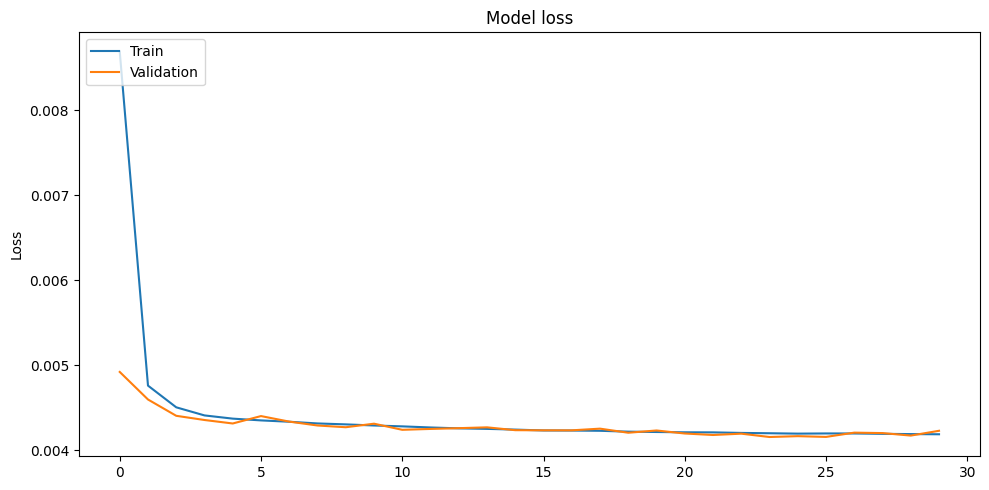

In [19]:
fig = plt.figure(figsize=(10,5))

# Plot training & validation loss values
ax = fig.add_subplot(1,1,1, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
results = model.evaluate(X_test, Y_test)
Y_pred = model.predict(X_test)
print("test loss:", results)

1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0042
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
test loss: 0.004241792019456625


In [21]:
score = r2_score(Y_test,Y_pred)#score_model(X_test, Y_test, model.predict(X_test))
scoretr=r2_score(Y_train,model.predict(X_train))
print('Test Score: ' + str( score  )   + '  Train Score: ' + str( scoretr ))

4000/4000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Test Score: 0.6904374102360669  Train Score: 0.6912554441378447


The scores here are of the order of the best scores we saw in the traditional models.

In [22]:
history.history

{'loss': [0.008692579343914986,
  0.004759572446346283,
  0.004504113458096981,
  0.004408717155456543,
  0.004370871465653181,
  0.004349996335804462,
  0.004334215074777603,
  0.004314221441745758,
  0.004303262569010258,
  0.00429002707824111,
  0.004279803484678268,
  0.004266796167939901,
  0.004256467800587416,
  0.004250263795256615,
  0.004241734277456999,
  0.004231607541441917,
  0.004230536986142397,
  0.004227645695209503,
  0.004217630717903376,
  0.004213432315737009,
  0.0042099496349692345,
  0.004209124017506838,
  0.004202647600322962,
  0.004198778420686722,
  0.004194254986941814,
  0.004196451511234045,
  0.0041961814276874065,
  0.004191794898360968,
  0.004188879393041134,
  0.0041867452673614025],
 'val_loss': [0.00492068799212575,
  0.004596219398081303,
  0.004404160194098949,
  0.004354722797870636,
  0.004313749726861715,
  0.004400963429361582,
  0.004335761535912752,
  0.004290038254112005,
  0.004269675817340612,
  0.00431130500510335,
  0.004239289090037

Here we fix the neuron numbers and tune the number of layers.

In [23]:

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(16,)))


  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=30, max_value=50, step=4)
  model.add(keras.layers.Dense(units=hp_units,
                               activation='relu'))
                              #  kernel_regularizer=keras.regularizers.l2(.05)))
  hp_units2 = hp.Int('units2', min_value=30, max_value=50, step=4)
  model.add(keras.layers.Dense(units=hp_units2,
                               activation='relu'))
  hp_units3 = hp.Int('units3', min_value=30, max_value=50, step=4)
  model.add(keras.layers.Dense(units=hp_units3,
                               activation='relu'))
                              #  kernel_regularizer=keras.regularizers.l2(.05)))
  hp_units4 = hp.Int('units4', min_value=30, max_value=50, step=4)
  model.add(keras.layers.Dense(units=hp_units4,
                               activation='relu'))
  hp_units5 = hp.Int('units5', min_value=8, max_value=32, step=4)
  model.add(keras.layers.Dense(units=hp_units5,
                               activation='relu'))
  hp_units6 = hp.Int('units6', min_value=8, max_value=32, step=4)
  model.add(keras.layers.Dense(units=hp_units6,
                               activation='relu'))

  model.add(keras.layers.Dense(16))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  learning_rate = 0.001

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss='mean_squared_error')

  return model

In [26]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='my_dirbigdata',
                     project_name='intro_to_kt',overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, Y_train,
             epochs=4,
             batch_size = 100,
             validation_split=0.2,
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal numbers: {best_hps.values}

""")


Trial 30 Complete [00h 00m 25s]
val_loss: 0.004333809949457645

Best val_loss So Far: 0.004293193109333515
Total elapsed time: 00h 05m 50s

The hyperparameter search is complete. The optimal numbers: {'units': 34, 'units2': 50, 'units3': 38, 'units4': 38, 'units5': 32, 'units6': 32, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}




In [27]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train,
                    epochs=15,
                    batch_size = 100,
                    validation_data=(X_test, Y_test))

val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0138 - val_loss: 0.0047
Epoch 2/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 3/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 4/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 5/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 6/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 8/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 9/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 10/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 11/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 12/15
1280/1280 ━━━━━━━━

In [28]:
results = model.evaluate(X_test, Y_test)
Y_pred = model.predict(X_test)
print("test loss:", results)
score = score_model(X_test, Y_test, model.predict(X_test))

print('Test Score: ' + str( score_model(X_test, Y_test, Y_pred  ))   + '  Train Score: ' + str( score_model(X_train, Y_train, model.predict(X_train))))

1251/1251 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0042
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
test loss: 0.004165728576481342
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Test Score: 0.6960736086974488  Train Score: 0.6966171930032389


In [29]:
r2_score(Y_test,Y_pred)

0.6960051853998573

The scores are rather similar to that of the previous model's. Next we tune layers and neurons simultaneously.

In [34]:
def build_model(hp):
    """
    Builds model and sets up hyperparameter space to search.
    
    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.
        
    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    """
    # Initialize sequential API and start building model.
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(16,)))
    
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 4, 8)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=8, max_value=40, step=4),
                activation="relu")
            )
        
        # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1.

    
    # Add output layer.
    model.add(keras.layers.Dense(units=16))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = 0.001 #hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='mean_squared_error')
    
    return model

In [36]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=10,
                     directory='my_dirlaybigerdata',
                     project_name='intro_to_ktlay',overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, Y_train,
             epochs=12,
             batch_size = 100,
             validation_split=0.2,
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.values}.
""")

Trial 30 Complete [00h 00m 27s]
val_loss: 0.005516663193702698

Best val_loss So Far: 0.004280653782188892
Total elapsed time: 00h 05m 54s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {'num_layers': 5, 'units_1': 40, 'units_2': 40, 'units_3': 28, 'units_4': 32, 'units_5': 36, 'units_6': 36, 'units_7': 40, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}.



In [37]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train,
                    epochs=15,
                    batch_size = 100,
                    validation_data=(X_test, Y_test))

val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0120 - val_loss: 0.0045
Epoch 2/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 3/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 4/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 5/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 6/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 8/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 9/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 10/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 11/15
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 12/15
1280/1280 ━━━━━━━━

In [38]:
print(Y_test[[200]],model.predict(X_test[[200]]))
Y_pred=model.predict(X_test)
scorete = r2_score(Y_test,Y_pred)
mtx=model.predict(X_train)
scoretr=r2_score(Y_train,model.predict(X_train))
print('Test Score: ' + str( scorete)    + '  Train Score: ' + str( scoretr ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[0.29698839 0.26153632 0.16092356 0.29558059 0.30142523 0.14005006
  0.25420936 0.09327975 0.16745461 0.26664446 0.07301361 0.11507371
  0.24771244 0.17817582 0.2879527  0.17029132]] [[0.27674845 0.30883107 0.23624748 0.44214255 0.26309243 0.15676169
  0.18598092 0.14735922 0.18743393 0.20877847 0.10028026 0.25234348
  0.21046302 0.20999262 0.25689518 0.18145663]]
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Test Score: 0.6916913997387658  Train Score: 0.6921797617554826


Again, scores are rather the same.

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 40)             │           680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 28)             │         1,148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,774 (57.71 KB)

 Trainable params: 4,924 (19.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,850 (38.48 KB)

Next we see how the model works for different sizes of data.

In [10]:
noise_std = 0.1




df1=pd.read_csv('Tomography - noise_0.1 - No of removed measurements_0.csv')
df1 = df1.drop('Unnamed: 0', axis=1)

data_sizes = [10000, 30000, 50000, 70000, 80000, 90000, len(df1) ]



train_scores= []
test_scores = []


for data_size in data_sizes:
    
    df = df1.sample(n=data_size)
    # df = df.sample(n=10000)
    # df = df.sample(n=20000)

    # print(df)

    # X = df[["feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8", "feature9", "feature10", "feature11", "feature12", "feature13", "feature14", "feature15", "feature16"]].multiply(1/df['feature1'], axis="index").to_numpy()

    X = df[["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8", "feature9", "feature10", "feature11", "feature12", "feature13", "feature14", "feature15", "feature16"]].to_numpy()


    Y = df[["label1", "label2", "label3", "label4", "label5", "label6", "label7", "label8", "label9", "label10", "label11", "label12", "label13", "label14", "label15", "label16"]].to_numpy()

    # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


    free_params = 16



    model = ks.Sequential()
    model.add(ks.layers.Dense(40, activation=ks.activations.relu, input_dim = free_params)  )
    model.add(ks.layers.Dense(40, activation=ks.activations.relu) )
    model.add(ks.layers.Dense(40, activation=ks.activations.relu) )
    model.add(ks.layers.Dense(40, activation=ks.activations.relu) )
    model.add(ks.layers.Dense(30, activation=ks.activations.relu)  )

    model.add(ks.layers.Dense(free_params)  )
    # model.summary()


    model.compile(optimizer= 'adam',
              loss = 'mean_squared_error'
              )
    

    n_epoch = 30
    btch_size = 200

    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

    history = model.fit( x=X_train,
            y=Y_train,
            epochs=n_epoch,
            batch_size = btch_size,
            validation_data=(X_val, Y_val),
            shuffle = True,
            #   st
            )
    
    train_scores.append(  r2_score(Y_train,model.predict(X_train)) )
    test_scores.append(  r2_score(Y_test,model.predict(X_test)) )

    # print(X[0])

Epoch 1/30


C:\Users\Kavyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0580 - val_loss: 0.0172
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - val_loss: 0.0115
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - val_loss: 0.0103
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0101 - val_loss: 0.0093
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - val_loss: 0.0084
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082 - val_loss: 0.0075
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 - val_loss: 0.0068
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - val_loss: 0.0054


C:\Users\Kavyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0478 - val_loss: 0.0111
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0074
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0048


C:\Users\Kavyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0277 - val_loss: 0.0086
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_loss: 0.0055
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 9/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 10/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 11/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 12/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

C:\Users\Kavyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0239 - val_loss: 0.0064
Epoch 2/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 3/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 4/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 5/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 6/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 7/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 8/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 9/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 11/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 12/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

C:\Users\Kavyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0234 - val_loss: 0.0060
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 9/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 11/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 12/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

C:\Users\Kavyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0257 - val_loss: 0.0054
Epoch 2/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 3/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 4/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 5/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 6/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 7/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 8/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 9/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 11/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 12/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

C:\Users\Kavyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0212 - val_loss: 0.0065
Epoch 2/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 3/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 4/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 5/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 6/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 7/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 8/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 9/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 11/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 12/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

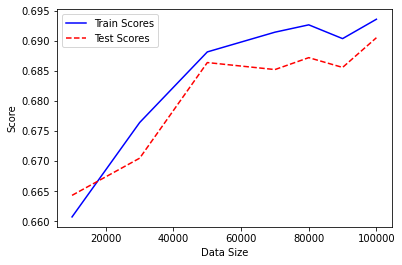

In [11]:
plt.plot(data_sizes, train_scores, label='Train Scores', color='b')
plt.plot(data_sizes, test_scores, label='Test Scores', color='r', linestyle='--')
 
# Adding labels and title
plt.xlabel('Data Size')
plt.ylabel('Score')
# plt.title('Multiple Lines Plot')
 
# Displaying the legend and the plot
plt.legend()
plt.show()

It seems that more data will not help that much.